**Preface/Introduction**

Geometric Brownian Motion: Using a stochastic differential equation (SDE) together with a brownian motion (weiner process) to model possible future paths of stock prices (and then run that model multiple times in  a monte carlo simulation).

So firstly lets take a look at the stock pricing model which we are going to build in python (before running that model thousands of times through a monte carlo simulation to generate thousands of possible future paths for the stock). That model is a combination of a Stochastic differential equation and a weiner process (brownian motion).

we're going to use laTex notation within google colab in order to state the model in scientific/mathematical notation before describing it. And i'm using (as a reference) the following notebook: https://colab.research.google.com/github/bebi103a/bebi103a.github.io/blob/main/lessons/00/intro_to_latex.ipynb#scrollTo=yy7o4iwaTHCx   to help with the laTex notation.

The model:

\begin{align}
\frac{dS}{S} = \mu dt + \sigma dW_1
\end{align}

Lets break the model down, so firstly dS is a small change in the Stock price (for example what it will change to tomorrow) whereas S is what the stock is currently and therefore

\begin{align}
\frac{dS}{S}
\end{align}

is a comparison of the changed stock price (the price tomorrow) compared to the current price/the price today. This stated change (comparing the current stock price to the changed process in the a next moment of time) is often called: The Return.

Note it is also important to understand that this stated change is a single change and therefore is for a single step or time moment in the model and that what 'd' is referring to (a small moment in time), d is also referring to a small change.

So if the left hand side of the equation (the SDE) is referring to a change, then the right hand side of the equation is modelling that same change but in more detail.
The change in stock price (in more detail) is comprised of two elements:  the first element being essentially what is called 'the drift' or a fraction of the expected annualised average movement, this is this portion:

\begin{align}
\mu dt
\end{align}

If we just left each step of the model as being that, and the annualised average change in the stock was a positive change e.g. 15% increase, then as the step change is just a small fraction (dt) of that, then every step change in the model would be positive. This would mean that every single modelled change is always positive and upwards, so we'd wind with just a 15% upward projection for every possible stock path with every single change always being positive, now whereas overall we know that the stock is 'likely' to increase across the year by 15%, it wouldn't be realistic to model step in that manner: real life doesn't work like that, we get highs, lows, ups and downs and erratic, random/stochastic behaviour, so we need a second 'random' element in the model which is this element:

\begin{align}
\sigma dW_1
\end{align}

  sigma ($\sigma$) is just the annualised volatility, i.e. on average across a  year how much the stock deviates from the average. Very often this is done by taking the standard deviation of each month, taking the average of that and projecting this across the year. 'di is just a fractional portion of sigma (relative to the model time step), so ($\sigma d$) is a time fractioned portion of the annualised volatility, but note that ($\sigma$) is one standard deviation, but there is an underlying assumption that if the stock price can change in accordance with the normal distribution, then the stock can change by as much as 3 standard deviations - so either upwards in size of 3 standard deviations or downwards in size (in accordance with the standard normal distribution model) by 3 standard deviations and the extent of the deviation follows the standard normal distribution but is also random, so it has a possible deviation range of as much 3 standard deviations but is most likely or most probable to deviate by 0 or between -1 and +1. And it is the weiner process (or brownian motion) that generates that stochastic sigma change factor and that stochastic normal distribution adjustment factor (generated by the weiner process) is this part of the equation:

  \begin{align}
\ W_1
\end{align}

Note that the Weiner process (brownian motion) instead of just stating it in the more abbreviated form 'W' in a more detailed form showing that it  follows the standard normal distribution, which is a normal dsitribution 'N' where the mean average of the distribution is 0 and the standard deviation is one standard deviation or 1, is annotated as follows:

  \begin{align}
\ N(0,\sigma^2 = t)
\end{align}

Note also that one standard deviation squared is the same as the time change and (that is to say if we take one standard deviation of change in stock value and square it we get the amount of time change). And therefore, simarly, if we take the square root of the change in time for one time step we get one standard deviation of a change in stock value. This relationship of the change in value of stock and change in value in time goes back to ideas noted by einstein and brown, which is that molecules although moving randomly tend to move in a square root relation to time.



Therefore the right hand side of the stochastic differential equation is stating the random (stochastic) change (the sigma part) together with predicatible regular 'drift' we routinely expect each year from the stock:

\begin{align}
 \mu dt + \sigma dW_1
\end{align}

So if we implement this equation in python, all we need to know is the annualised average movement of the stock and the annualised average standard deviation (one standard deviation) of the stock, and as long as we can take  a fraction of those parameters (in accordance with whichever timestep 'd' we agree upon e.g. one day (t), and adjust this by the normally distributed random (stochastic) factor (from the weiner process), then we're good to go, we now have a model that can effectively model each change in the stock in accordance with sound/realistic modelling principles that only model in the routine expected factor but also a reasonable random/stochastic factor.

Finally if we can use this model to effectively model a possible path of stock through the year, we can take that model and run it multiple times through a 'simulator' (whose job is literally just to keep re-running the model and record the results) and this simulator is popularly called: 'the monte carlo simulation', the reason we want to see this model run many times (and probably thousands of times) is because of the stochastic/random part of the model, this means that for each run of the model, we'll get different stock paths, but if we run the model thousands of times we will get 1: the highest possible future price from all possible paths 2: the lowest possible future price from all possible paths 3. the most likely/probably possible future path. I think that the most useful aspect of this model is calculating the highsest possible future price and the lowest possible future price, because these prices can be used for (and in fact are used in) OPTIONS pricing model.













In [1]:
# note that this ipython notebook has been built in google colab: https://colab.research.google.com/
#import the core modules which we need to build the model and run the simulation
# very often when we deal with data and also run scientific/mathematical operations across that data we need the following two packages

import numpy as np #contains array constructs and classes for random numbers and normal distributions
import pandas as pd # contain classes which allow us to handle data structures

# we also want visualisations so we're going to invoke a package useful for visualising data structures, namely matplotlib
import matplotlib.pyplot as plt
# a magic command here which gives intel about how code is working
%matplotlib inline

# we need historic finance data as a basis from which to model the future stock price paths
# note i'm assuming that googlecolab is making yfinance available (I may need to do a pip install if it isn't)
import yfinance as yf



In [2]:

# next we download a history of apple stock into a pandas dataframe called 'actual_hist'
# note the use of the download method of the yfinance class
# name of stock ticker = aapl
# start date and end date specified to pull the stock data
actual_hist  = yf.download('aapl','2017-12-29','2019-12-30')

#aapl.history(start="2017-12-29",end="2019-12-30", auto_adjust=False)

# we use the iloc function of the pandas dataset to look at the first row (0) and the last row (-1) to take a quick look and see
# if the data looks sensible at first sight:

print(actual_hist.iloc[[0,-1]])


[*********************100%***********************]  1 of 1 completed

Price       Adj Close      Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                                        
2017-12-29  39.811539  42.307499  42.647499  42.305000  42.630001  103999600
2019-12-27  70.239006  72.449997  73.492500  72.029999  72.779999  146266000


In [3]:
# see stock details further clearly in dataframe
print(actual_hist)

Price       Adj Close      Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                                        
2017-12-29  39.811539  42.307499  42.647499  42.305000  42.630001  103999600
2018-01-02  40.524338  43.064999  43.075001  42.314999  42.540001  102223600
2018-01-03  40.517292  43.057499  43.637501  42.990002  43.132500  118071600
2018-01-04  40.705498  43.257500  43.367500  43.020000  43.134998   89738400
2018-01-05  41.168930  43.750000  43.842499  43.262501  43.360001   94640000
...               ...        ...        ...        ...        ...        ...
2019-12-20  67.728050  69.860001  70.662498  69.639999  70.557503  275978000
2019-12-23  68.833244  71.000000  71.062500  70.092499  70.132500   98572000
2019-12-24  68.898697  71.067497  71.222504  70.730003  71.172501   48478800
2019-12-26  70.265678  72.477501  72.495003  71.175003  71.205002   93121200

Text(0, 0.5, 'Close')

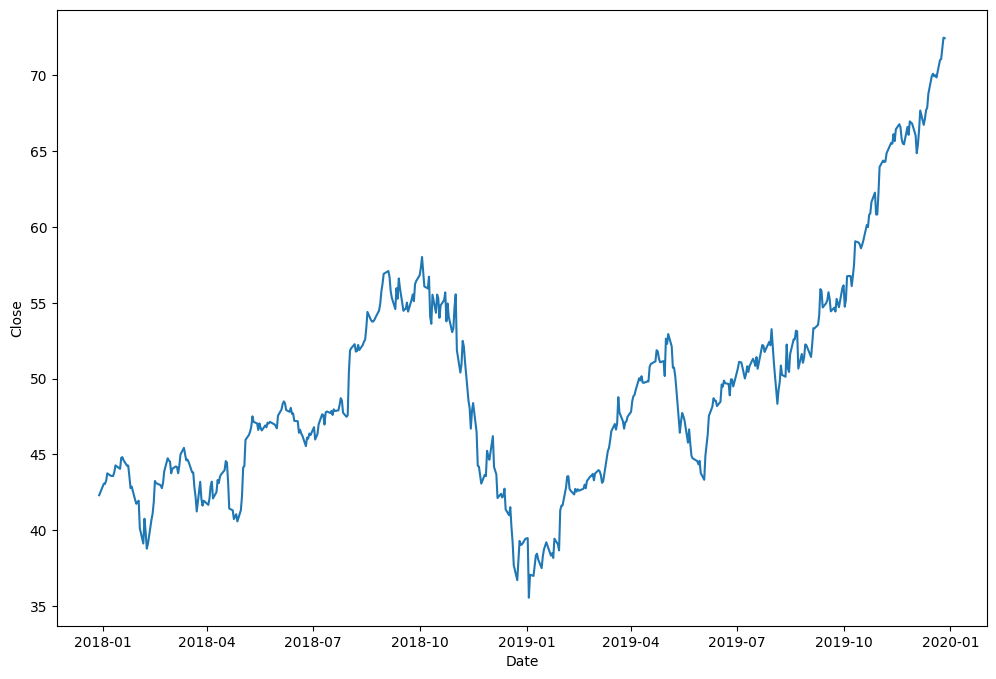

In [5]:
#now lets use pyplot to get a visualisation of the history of the apple stock (appl) over time

#first we create a figure (or window) within which to hold the chart visualisation
fig = plt.figure(figsize=(12,8))
# next we create the essential chart on the basis of a specific dimension on the dataset, in this case the closing price (Close)
# note that the index field is automatically invoked in the chart, we don't need to specify its inclusion, in this case the index is 'date'
plt.plot(actual_hist['Close'])
# we label the x axis which will show the index value 'date'
plt.xlabel('Date')
# the y axis contains the value we are concerned to plot against the time/date index, namely the stock close price values, we add the y label:
plt.ylabel('Close')

## modelling changes in stock price in days (changes per day) shown in plot



In [6]:
# now we start building the model  and what we're actually going to do in this case is instead of using the model to predict a future price
# what we're actually going to do is retrospectively generate prices for the time period that we downloaded stock data for, using the
# initial price as a basis upon which to generate 100's of stock price pathways for that historic period of time and then compare the
# results of the model to the actual historic stock prices, so what we're actually doing is asking what the model would generate for a known
# period of time

# from the historic data (given that it is daily data) we derive the number of time steps (n_t)

n_t = len(actual_hist)
# pint out the number of trading days from the historic data:
print ("Number of historic trading days in downloaded data ", n_t)

# next we're doing to state that we model 10000 stock paths using the model (in other words we'll run the monte carlo simulation which will run
# the model) 10000 times based on around 504 stock prices of actual prices based on dates. 504 trading days (which is 2 years)
n_mc = 10000
#10000 simulation 1 column per path it could have taken 504 X 10000 dataframe.

# next we create a huge dataframe which will hold (in each column) each simulated pathway - the results for each run of the model
# note that each row holds each day, but that each column holds a unique stock pathway from each monte carlo model run
St = pd.DataFrame(0., index=actual_hist.index, columns = list(range(1,n_mc+1)))
# for all columns in the results dataframe (and therefore each possible pathway) the initial/first day value is set to the value of the first close price
# in the actual_hist dataframe
St.iloc[0] = actual_hist['Close'].iloc[0]

# next we state the main parameters for the stock (annualised volatility and the annualised mean average stock price also known as the drift)
# note that implicity (here) these parameters are assumed/given - in reality we would need to calculate

# annualised volatility: 0.25 = 25% it can deviate from the mu drift by around 25% over the year.
sigma = 0.25
# drift (also known as annualised mean but 'drift' is a business term which translates to a business growth assumption)
# 0.08 = 8% drift /avergae growth
mu = 0.08


#******next we define the time step which is conventionally stated as a fraction of 1 year)***********
# conventionally (in finance) time is phrased in relation to 1 year, which (conventionally) in finance is a 252 day trading year
# note that in our historic data we actually have 2 trading years worth of data
# if the data contains 2 years worth of data and we express 1 day as a fraction of a year (keeping in mind we have 2 years data)
# we use the total number of days in the dataset to get at the number of days in 2 years, and we divide 2 by the total number
# of days in two years to express a single day as a fraction of a year (we're trying to state a day as a fraction of one year from the data)
# we need a single day stated as a fraction of a year, because this is going to be our single time step in the model.
# needs to be scaled to 1 year and as this has 2 years woth of data then divide by 2.
# this will give the single day fraction model per day
dt = 2./(n_t - 1)

# now that we have the day fraction defined we can adjust/scale the annualised volatility sigma to a day's worth fraction also
daily_sigma = sigma*np.sqrt(dt)
print ("The daily (scaled) volatility/sigma is: ", daily_sigma)















Number of historic trading days in downloaded data  502
The daily (scaled) volatility/sigma is:  0.015795600590164084


In [8]:
# the model is created and run through a montecarlo simulation and the results are output in the results dataframe ST
# note that the for each loop only tackles the number of rows/timesteps
# loops for 504 days which is for 2 years
# start at day2 look back 1 days first day X change factor ratio to get the next day value and having 10000 imulations.
for i in range (1, n_t):
    # dS_2_S is 10000 changes in stock generated using the stochastic differential equation (time adjust drift plus random normally distributed
    # time adjusted volatility) - i.e 10000 time step stock adjustments - one for each of the 10000 models , for one day
    dS_2_S = mu*dt + daily_sigma*np.random.randn(n_mc)
    # he next day's values become the previous days values plus the model adjustment (for each day)
    St.iloc[i] = St.iloc[i-1] + St.iloc[i-1]*dS_2_S

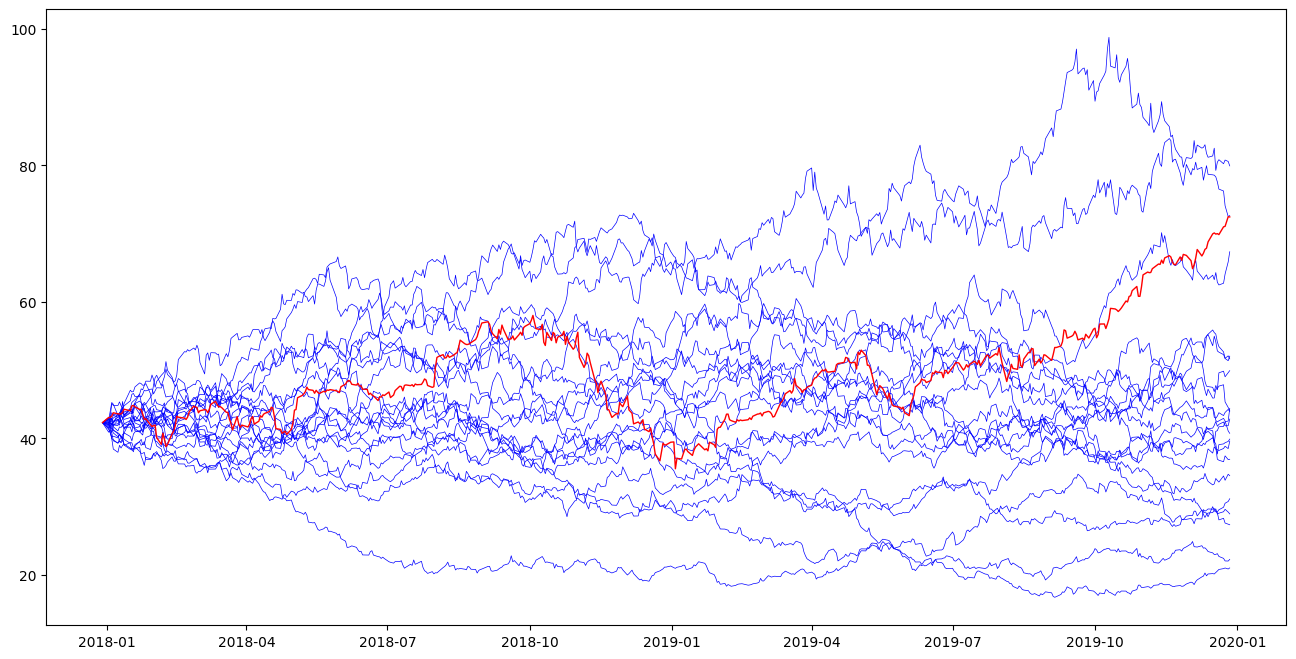

In [9]:
# create a plot and randomly select a specific number of paths resulting from the simulation/model and visualise
# and moreover display the results of the model against the actual historical price
fig = plt.figure(figsize=(16,8))
axl = fig.add_subplot(111)
# the choice method of the numpy random class is used to randomly pick a number from 1 to 10000, and this is done 20 times which
# also links to the for each loop being run 20 times - i.e. we pick 20 model results randomly from our set of model results 'ST'
for i in np.random.choice(np.array(range(1,n_mc+1)), size=20):
  # the random selected above 'i' is used to select a column from the results of the model 'ST' and this pathway is then plotted  in blue
  # line thickness being 0.5
  axl.plot(St[i], 'b', lw=0.5)

# in addition to the 20 randomly picked results of the model we also now add the actuals as red thicker line to the plot
axl.plot(actual_hist['Close'],'r', lw=1 )
plt.show()

##looks at the past random monte carlo 10000 times against actual.

Blue is the possible path of stock prices using random walk and red is the actual stock price it did take. actual stock price fell within the prediction its kind of following a similair pattern. Clustering of the possible path blue line has a strong points kind of match the red actual stock price. its roughly accurate/or very similiar. Stretch out the path it could feasibly could take in blue. Behaviour follow normal distribution and deriation based on square root of time, volatility it shows a range of random behaviour to help predict to generate all the possible path to give upper and lower extreme, could go as low or high as this. it gives Possible degree of increase or descrease in time over a certain period of time to get expectations further. When its likely to go up or go down by and by what period in time. This is used to price contracts / options which give you to buy the stock in the future over a period of time ie in 1 years time. This will mean that the contract/option will need to be priced. This could be via looking at the upper most likely value against the lower most likely value and taking a mean of those 2 and working out the payoff function, gives you a reasonble price of the option/contract at a point in time. This is used to price the option / contract. Right to buy for a specified price in 1 year time due to the option price that is specified will the mathematics to pricing options or a possible investor this is very useful.
